## CSYE 7245 Final Project - DGA Detection 

## Features Engineering Part


### Course Information
* **School**: College of Engineering, Northeastern University
* **Course Name**: Big-Data Systems and Intelligence Analytics
* **Professor**: Nik Brown

### Group Members
- Haimin Zhang
- Lixi Zhou
- Shiqi Dai

Data link **(Please access Google Drive with Northeastern Account)**:

https://drive.google.com/drive/folders/1m-p5_liIoSeX2pJhfMSCDDtTm3XyTCrq?usp=sharing

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from publicsuffixlist import PublicSuffixList

psl = PublicSuffixList()

In [46]:
def ignoreVPS(domain):
    # Return the rest of domain after ignoring the Valid Public Suffixes:
    validPublicSuffix = '.' + psl.publicsuffix(domain)
    if len(validPublicSuffix) < len(domain):
         # If it has VPS
        subString = domain[0: domain.index(validPublicSuffix)]  
    elif len(validPublicSuffix) == len(domain):
        return 0
    else:
        # If not
        subString = domain
    
    return subString

In [47]:
df_domains = pd.read_csv('data/mixed_domain.csv')
df_domains.head()

,DGA_Family,Domain,Type
0,none,propertylogic.net,Normal
1,gameover,1yyv72l1i6hi0p1jwbztv1enbz41.com,DGA
2,gameover,1pmutw21mlnjzu14gakr919a5gpq.net,DGA
3,none,exton.se,Normal
4,rovnix,aag2ikjo5xb2qaovh3.com,DGA


In [48]:
df_domains['Domain'].isnull().sum()

0

Convert **Type** to **Binary** variable DGA = 1, Normal = 0

In [49]:
df_domains['Type'] = df_domains['Type'].apply(lambda x: 1 if x == 'DGA' else 0)
df_domains.head()

,DGA_Family,Domain,Type
0,none,propertylogic.net,0
1,gameover,1yyv72l1i6hi0p1jwbztv1enbz41.com,1
2,gameover,1pmutw21mlnjzu14gakr919a5gpq.net,1
3,none,exton.se,0
4,rovnix,aag2ikjo5xb2qaovh3.com,1


### Structural Features

Generate Domain Name Length **(DNL)** on dataset

In [50]:
df_domains['DNL'] = df_domains['Domain'].apply(lambda x: len(x))
df_domains.head()

,DGA_Family,Domain,Type,DNL
0,none,propertylogic.net,0,17
1,gameover,1yyv72l1i6hi0p1jwbztv1enbz41.com,1,32
2,gameover,1pmutw21mlnjzu14gakr919a5gpq.net,1,32
3,none,exton.se,0,8
4,rovnix,aag2ikjo5xb2qaovh3.com,1,22


Generate Number of Subdomains **(NoS)** on dataset

ignore valid public suffixes

In [51]:
df_domains['NoS'] = df_domains['Domain'].apply(lambda x: ignoreVPS(x).count('.') + 1)
df_domains.head()

,DGA_Family,Domain,Type,DNL,NoS
0,none,propertylogic.net,0,17,1
1,gameover,1yyv72l1i6hi0p1jwbztv1enbz41.com,1,32,1
2,gameover,1pmutw21mlnjzu14gakr919a5gpq.net,1,32,1
3,none,exton.se,0,8,1
4,rovnix,aag2ikjo5xb2qaovh3.com,1,22,1


Generate Subdomain Length Mean **(SLM)** on dataset

ignore valid public suffixes

In [52]:
def calculateSLM(input):
    subdomain = ignoreVPS(input)
    
    result = (len(subdomain) - subdomain.count('.')) / (subdomain.count('.') + 1)
    
    return result

In [53]:
df_domains['SLM'] = df_domains['Domain'].apply(lambda x: calculateSLM(x))
df_domains.head()

,DGA_Family,Domain,Type,DNL,NoS,SLM
0,none,propertylogic.net,0,17,1,13.0
1,gameover,1yyv72l1i6hi0p1jwbztv1enbz41.com,1,32,1,28.0
2,gameover,1pmutw21mlnjzu14gakr919a5gpq.net,1,32,1,28.0
3,none,exton.se,0,8,1,5.0
4,rovnix,aag2ikjo5xb2qaovh3.com,1,22,1,18.0


Generate Has www Prefix **(HwP)** 0 or 1

In [54]:
df_domains['HwP'] = df_domains['Domain'].apply(lambda x: 1 if x.split('.')[0] == 'www' else 0)
df_domains.head()

,DGA_Family,Domain,Type,DNL,NoS,SLM,HwP
0,none,propertylogic.net,0,17,1,13.0,0
1,gameover,1yyv72l1i6hi0p1jwbztv1enbz41.com,1,32,1,28.0,0
2,gameover,1pmutw21mlnjzu14gakr919a5gpq.net,1,32,1,28.0,0
3,none,exton.se,0,8,1,5.0,0
4,rovnix,aag2ikjo5xb2qaovh3.com,1,22,1,18.0,0


Generate Has a Valid Top Level Domain **(HVTLD)** 0 or 1

In [55]:
# Load Valid Top Level Domains data
import sys

topLevelDomain = []
with open('data/tlds-alpha-by-domain.txt', 'r') as content:
    for line in content:
        topLevelDomain.append((line.strip('\n')))
        
print(topLevelDomain)

['AAA', 'AARP', 'ABARTH', 'ABB', 'ABBOTT', 'ABBVIE', 'ABC', 'ABLE', 'ABOGADO', 'ABUDHABI', 'AC', 'ACADEMY', 'ACCENTURE', 'ACCOUNTANT', 'ACCOUNTANTS', 'ACO', 'ACTIVE', 'ACTOR', 'AD', 'ADAC', 'ADS', 'ADULT', 'AE', 'AEG', 'AERO', 'AETNA', 'AF', 'AFAMILYCOMPANY', 'AFL', 'AFRICA', 'AG', 'AGAKHAN', 'AGENCY', 'AI', 'AIG', 'AIGO', 'AIRBUS', 'AIRFORCE', 'AIRTEL', 'AKDN', 'AL', 'ALFAROMEO', 'ALIBABA', 'ALIPAY', 'ALLFINANZ', 'ALLSTATE', 'ALLY', 'ALSACE', 'ALSTOM', 'AM', 'AMERICANEXPRESS', 'AMERICANFAMILY', 'AMEX', 'AMFAM', 'AMICA', 'AMSTERDAM', 'ANALYTICS', 'ANDROID', 'ANQUAN', 'ANZ', 'AO', 'AOL', 'APARTMENTS', 'APP', 'APPLE', 'AQ', 'AQUARELLE', 'AR', 'ARAB', 'ARAMCO', 'ARCHI', 'ARMY', 'ARPA', 'ART', 'ARTE', 'AS', 'ASDA', 'ASIA', 'ASSOCIATES', 'AT', 'ATHLETA', 'ATTORNEY', 'AU', 'AUCTION', 'AUDI', 'AUDIBLE', 'AUDIO', 'AUSPOST', 'AUTHOR', 'AUTO', 'AUTOS', 'AVIANCA', 'AW', 'AWS', 'AX', 'AXA', 'AZ', 'AZURE', 'BA', 'BABY', 'BAIDU', 'BANAMEX', 'BANANAREPUBLIC', 'BAND', 'BANK', 'BAR', 'BARCELONA', 'BARC

In [56]:
df_domains['HVLTD'] = df_domains['Domain'].apply(lambda x: 1 if x.split('.')[len(x.split('.')) - 1].upper() in topLevelDomain else 0)
df_domains.head()

,DGA_Family,Domain,Type,DNL,NoS,SLM,HwP,HVLTD
0,none,propertylogic.net,0,17,1,13.0,0,1
1,gameover,1yyv72l1i6hi0p1jwbztv1enbz41.com,1,32,1,28.0,0,1
2,gameover,1pmutw21mlnjzu14gakr919a5gpq.net,1,32,1,28.0,0,1
3,none,exton.se,0,8,1,5.0,0,1
4,rovnix,aag2ikjo5xb2qaovh3.com,1,22,1,18.0,0,1


Generate Contains Single-Character Subdomain **(CSCS)** on dataset

ignore valid public suffixes

In [57]:
def findMinLengthOfList(input):
    input = ignoreVPS(input)
    str_split = input.split('.')
    minLength = len(str_split[0])
    for i in range(0, len(str_split) - 1):
        minLength = len(str_split[i]) if len(str_split[i]) < minLength else minLength
    return minLength

In [58]:
df_domains['CSCS'] = df_domains['Domain'].apply(lambda x: 1 if findMinLengthOfList(x) == 1 else 0)
df_domains.head()

,DGA_Family,Domain,Type,DNL,NoS,SLM,HwP,HVLTD,CSCS
0,none,propertylogic.net,0,17,1,13.0,0,1,0
1,gameover,1yyv72l1i6hi0p1jwbztv1enbz41.com,1,32,1,28.0,0,1,0
2,gameover,1pmutw21mlnjzu14gakr919a5gpq.net,1,32,1,28.0,0,1,0
3,none,exton.se,0,8,1,5.0,0,1,0
4,rovnix,aag2ikjo5xb2qaovh3.com,1,22,1,18.0,0,1,0


Generate Is Exclusive Prefix Repetition **(IEPR)**

Generate Contains TLD as Subdomain **(CTS)**

ignore valid public suffixes

In [59]:
def containTLDasSubd(input):
    input = ignoreVPS(input)
    str_split = input.split('.')
    for i in range(0, len(str_split) - 1):
        if str_split[i].upper() in topLevelDomain:
            return True
    return False

In [60]:
df_domains['CTS'] = df_domains['Domain'].apply(lambda x: 1 if containTLDasSubd(x) else 0)
df_domains.head()

,DGA_Family,Domain,Type,DNL,NoS,SLM,HwP,HVLTD,CSCS,CTS
0,none,propertylogic.net,0,17,1,13.0,0,1,0,0
1,gameover,1yyv72l1i6hi0p1jwbztv1enbz41.com,1,32,1,28.0,0,1,0,0
2,gameover,1pmutw21mlnjzu14gakr919a5gpq.net,1,32,1,28.0,0,1,0,0
3,none,exton.se,0,8,1,5.0,0,1,0,0
4,rovnix,aag2ikjo5xb2qaovh3.com,1,22,1,18.0,0,1,0,0


In [61]:
df_domains[df_domains['CTS'] == 1]

,DGA_Family,Domain,Type,DNL,NoS,SLM,HwP,HVLTD,CSCS,CTS
4812,none,forum.ucoz.com,0,14,2,4.500000,0,1,0,1
11758,none,lilly.tumblr.com,0,16,2,5.500000,0,1,0,1
15234,none,shangrila.sharepoint.com,0,24,2,9.500000,0,1,0,1
26420,none,design.sitew.com,0,16,2,5.500000,0,1,0,1
50394,none,no.comunidades.net,0,18,2,6.500000,0,1,0,1
52543,none,blog.ucoz.ru,0,12,2,4.000000,0,1,0,1
54682,none,it.webs.com,0,11,2,3.000000,0,1,0,1
61476,none,lhzong.blog.163.com,0,19,3,4.333333,0,1,0,1
65338,none,storage.ning.com,0,16,2,5.500000,0,1,0,1
73565,none,community.weebly.com,0,20,2,7.500000,0,1,0,1


Generate Ratio of Digit-Exclusive Subdomains **(RDES)**

ignore valid public suffixes

Generate Underscore Ratio **(UR)** on dataset

ignore valid public suffixes

In [62]:
def calculateUndersRatio(input):
    subString = ignoreVPS(input)
    
    result = subString.count('_') / (len(subString) - subString.count('.'))
    
    return result

In [63]:
df_domains['UR'] = df_domains['Domain'].apply(lambda x: calculateUndersRatio(x))
df_domains.head()

,DGA_Family,Domain,Type,DNL,NoS,SLM,HwP,HVLTD,CSCS,CTS,UR
0,none,propertylogic.net,0,17,1,13.0,0,1,0,0,0.0
1,gameover,1yyv72l1i6hi0p1jwbztv1enbz41.com,1,32,1,28.0,0,1,0,0,0.0
2,gameover,1pmutw21mlnjzu14gakr919a5gpq.net,1,32,1,28.0,0,1,0,0,0.0
3,none,exton.se,0,8,1,5.0,0,1,0,0,0.0
4,rovnix,aag2ikjo5xb2qaovh3.com,1,22,1,18.0,0,1,0,0,0.0


In [64]:
df_domains[df_domains['UR'] > 0]

,DGA_Family,Domain,Type,DNL,NoS,SLM,HwP,HVLTD,CSCS,CTS,UR
10435,none,6265014241875110812_94f17361fe8595b3ea47d00db2...,0,73,1,60.0,0,1,0,0,0.016667
79243,none,4827568229605927995_ecd80635b4be3a2e7513e88d30...,0,73,1,60.0,0,1,0,0,0.016667
118106,none,8559985387857822861_f4af8afc5c21f19767499e7aac...,0,73,1,60.0,0,1,0,0,0.016667
196092,none,4258089004293075228_4e7ffa1f9bb3f2b6e9a84a03e9...,0,73,1,60.0,0,1,0,0,0.016667
249545,none,1488844350286859831_9fd3046ef72a5d5717eae9c83b...,0,73,1,60.0,0,1,0,0,0.016667
348319,none,4828404074737729789_5a9529aefb2cec59f7eb9b941f...,0,73,1,60.0,0,1,0,0,0.016667
378059,none,4468446563667411164_01869c0f0abd85558189f91f98...,0,73,1,60.0,0,1,0,0,0.016667
383896,none,7046530139707959356_7bf8fd2d34a8edd36beaf3d546...,0,73,1,60.0,0,1,0,0,0.016667
543959,none,5062966441153122889_9b1df9847a70fa5642285e17d2...,0,73,1,60.0,0,1,0,0,0.016667
553926,none,6031675625031736446_4d738a3dc2ac68ef6791fc8388...,0,73,1,60.0,0,1,0,0,0.016667


Generate Contains IP Address **(CIPA)** on dataset

ignore valid public suffixes

In [65]:
import re

In [66]:
def checkCIPA(input):
    splitSet = input.split('.')
    for element in splitSet:
        if(re.match("\d+", element)) == None:
            return False
    
    return True

In [67]:
df_domains['CIPA'] = df_domains['Domain'].apply(lambda x: 1 if checkCIPA(x) else 0)
df_domains.head()

,DGA_Family,Domain,Type,DNL,NoS,SLM,HwP,HVLTD,CSCS,CTS,UR,CIPA
0,none,propertylogic.net,0,17,1,13.0,0,1,0,0,0.0,0
1,gameover,1yyv72l1i6hi0p1jwbztv1enbz41.com,1,32,1,28.0,0,1,0,0,0.0,0
2,gameover,1pmutw21mlnjzu14gakr919a5gpq.net,1,32,1,28.0,0,1,0,0,0.0,0
3,none,exton.se,0,8,1,5.0,0,1,0,0,0.0,0
4,rovnix,aag2ikjo5xb2qaovh3.com,1,22,1,18.0,0,1,0,0,0.0,0


In [68]:
df_domains[df_domains['CIPA'] == 1]

,DGA_Family,Domain,Type,DNL,NoS,SLM,HwP,HVLTD,CSCS,CTS,UR,CIPA


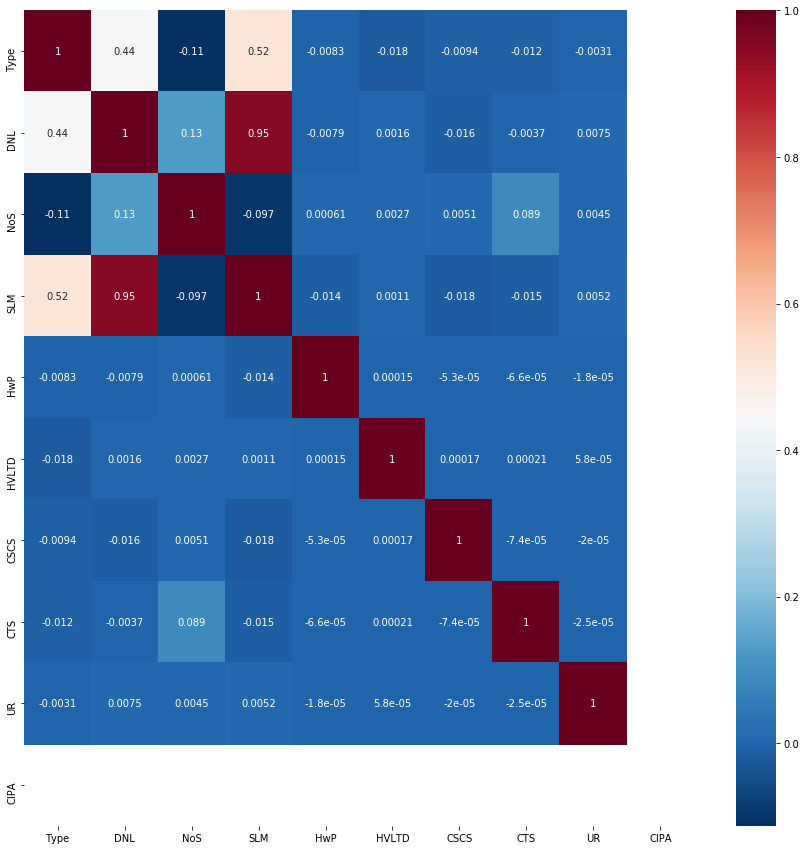

In [69]:

%matplotlib inline
plt.figure(figsize=(15,15))
sns.heatmap(df_domains.corr(), annot=True, cmap= "RdBu_r")

### Linguistic Features&Statistical Features

In [ ]:
import math
import collections
from tld import get_tld
import re

def get_subdomain(domain):
  res = get_tld('http://' + domain.strip())
  tmp = domain.rfind(res)
  if tmp > 0:
    third_ld = domain[:tmp - 1]
    return third_ld
  
def prc_entropy(domain):
    """
    calculate the entropy of subdomain
    :param domain_str: subdomain
    :return: the value of entropy
    """
    subdomain = get_subdomain(domain)
    # get probability of chars in string
    prob = [float(subdomain.count(c)) / len(subdomain) for c in dict.fromkeys(list(subdomain))]

    # calculate the entropy
    entropy = - sum([p * math.log(p) / math.log(2.0) for p in prob])
    return entropy

def prc_rrc(domain):
  """
  calculate the Ratio of Repeated Characters in a subdomain
  """
  subdomain = get_subdomain(domain)
#   subdomain =''.join(re.findall('[a-zA-Z]+', subdomain)) 
  subdomain = re.sub("[.]", "", subdomain)
  char_num=0
  repeated_char_num=0
  d = collections.defaultdict(int)
  for c in list(subdomain):
      d[c] += 1
  for item in d:
    char_num +=1
    if d[item]>1:
      repeated_char_num +=1
  ratio = repeated_char_num/char_num
  return ratio

In [ ]:
pandas_mixed_domain['Entropy']= pandas_mixed_domain['Domain'].apply(lambda x:prc_rrc(x))
pandas_mixed_domain['RRC']= pandas_mixed_domain['Domain'].apply(lambda x:prc_entropy(x))

In [70]:
df_domains.to_csv("data/domain_withFeatures.csv", index=False)

In [71]:
df_domains.head()

,DGA_Family,Domain,Type,DNL,NoS,SLM,HwP,HVLTD,CSCS,CTS,UR,CIPA
0,none,propertylogic.net,0,17,1,13.0,0,1,0,0,0.0,0
1,gameover,1yyv72l1i6hi0p1jwbztv1enbz41.com,1,32,1,28.0,0,1,0,0,0.0,0
2,gameover,1pmutw21mlnjzu14gakr919a5gpq.net,1,32,1,28.0,0,1,0,0,0.0,0
3,none,exton.se,0,8,1,5.0,0,1,0,0,0.0,0
4,rovnix,aag2ikjo5xb2qaovh3.com,1,22,1,18.0,0,1,0,0,0.0,0
